# Task #1 - Prediction using Supervised ML

In [1]:
# For Data analysis, manipulation, and visualization.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# For Training/testing, selecting a model, and Evaluating a model performance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('http://bit.ly/w-data')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.shape

(25, 2)

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Data Visualisation**

Text(0.5, 1.0, 'Hours studied VS Score')

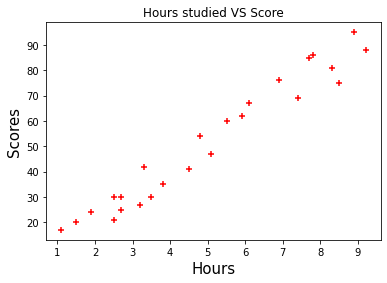

In [8]:
plt.scatter(df.Hours,df.Scores,color='r',marker = '+')
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title("Hours studied VS Score")

**Model Training**

In [9]:
X = df.iloc[:,:-1].values #df[['Hours']]
y = df.iloc[:,1:].values   #df[['Scores']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [11]:
X_train.shape

(20, 1)

In [12]:
X.shape

(25, 1)

In [13]:
X_test.shape

(5, 1)

In [14]:
#Shape of testing Data
print(y.shape,y_train.shape,y_test.shape)

(25, 1) (20, 1) (5, 1)


In [15]:
reg =LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

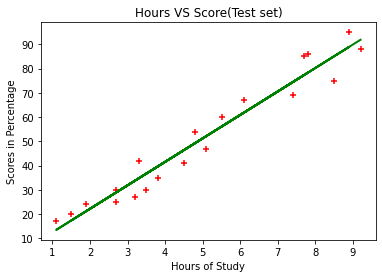

In [16]:
# Calculate Line with training data.
line = reg.coef_*X_train + reg.intercept_

# Best-fit line for training data.
plt.scatter(X_train,y_train, marker="+", color="red")
plt.plot(X_train,line, color="green", linestyle="-", linewidth=2)
plt.xlabel("Hours of Study")
plt.ylabel("Scores in Percentage")
plt.title("Hours VS Score(Test set)")
plt.show()

In [17]:
print("B0 =",reg.intercept_,"\nm =",reg.coef_)## β0 is Intercept & Slope of the line is β1.,"

B0 = [2.82689235] 
m = [[9.68207815]]


In [18]:
y_pred = reg.predict(X_test)

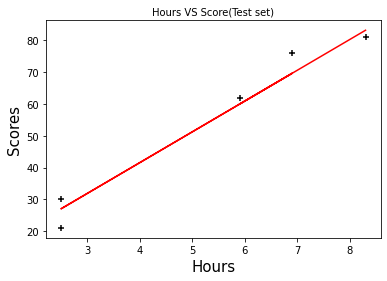

In [19]:
#plotting line on test data
plt.plot(X_test,y_pred,color='red')
plt.scatter(X_test,y_test,color='black',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Hours VS Score(Test set)",fontsize=10)
plt.show()

In [20]:
#Comparing Actual vs Predicted Scores
Y_test1 = list(y_test)
prediction=list(y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,[81],[83.18814103588203]
1,[30],[27.03208774003898]
2,[21],[27.03208774003898]
3,[76],[69.63323161964405]
4,[62],[59.951153465188355]


In [21]:
#ACCURACY OF THE MODEL
from sklearn import metrics
metrics.r2_score(y_test,y_pred)##Goodness of fit Test

0.9678055545167994

In [22]:
#Predicting the Error
from sklearn.metrics import mean_squared_error,mean_absolute_error
MSE = metrics.mean_squared_error(y_test,y_pred)

In [23]:
root_E = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  18.943211722315272
Root Mean Squared Error =  4.352380006653288
Mean Absolute Error     =  4.352380006653288


In [24]:
#Predicting the score

In [25]:
# Predict score for 9.25 hours
predict_hour = 9.25
pred_value = reg.predict(np.array([[predict_hour]]))
print("Predicted score for",predict_hour,"hour of study is:",pred_value[0][0])

Predicted score for 9.25 hour of study is: 92.38611528261494


In [26]:
pred_value[0]

array([92.38611528])

# The predicted score for a student studying a 9.25 hours of a day is 92.386

-----------------------------------------------------------------------------------------**THANK YOU**------------------------------------------------------------------------------------------